In [11]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [12]:
G = nx.DiGraph()

G.add_node(1, demand = -5, color='blue')
G.add_node(2, demand = 0, color='red')
G.add_node(3, demand = 5, color='blue')

G.add_edge(1, 2, weight= 0, capacity = 5, color='green' )
G.add_edge(2, 3, weight= 0, capacity = 5, color='green' )
G.add_edge(3, 1, weight= 1, capacity = 5, color='green' )

# Calcular el flujo de costo mínimo
flow_dict = nx.min_cost_flow(G)

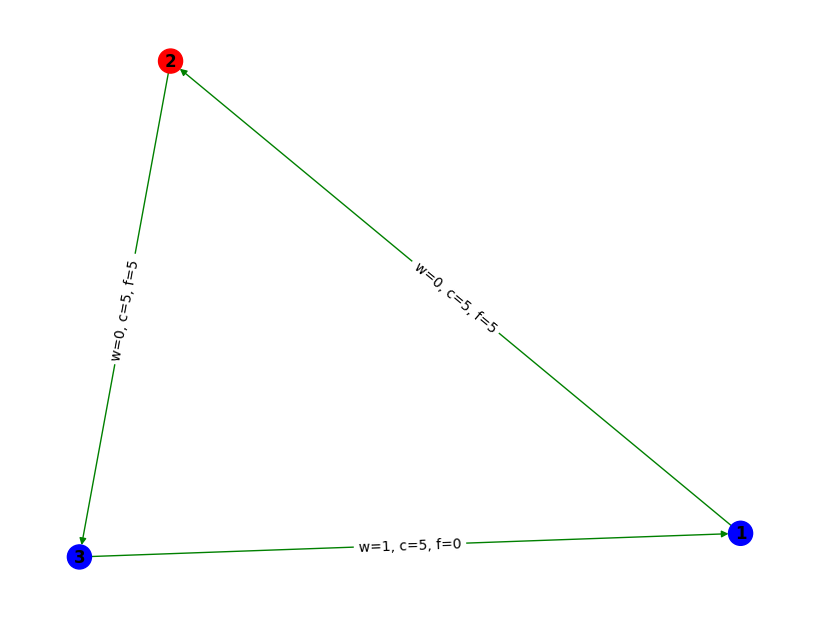

In [15]:
# Crear etiquetas para los bordes que muestren peso, capacidad y flujo
edge_labels = {(u, v): f"w={d['weight']}, c={d['capacity']}, f={flow_dict[u][v]}" 
               for u, v, d in G.edges(data=True)}

# Asignar colores a los nodos y bordes
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [14]:
flow_dict = nx.min_cost_flow(G)
flow_dict

{1: {2: 5}, 2: {3: 5}, 3: {1: 0}}